In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [4]:
adult_df = pd.read_csv('ÏÑ±Ïù∏Ïù∏Íµ¨ÏÜåÎìù_refined.csv')
adult_df = adult_df.drop(['Unnamed: 0'], axis=1)
adult_df[:5]

age workclass     fnlwgt     education  education.num marital.status  \
0   90         ?  11.252262       HS-grad              9        Widowed   
1   82   Private  11.797134       HS-grad              9        Widowed   
2   66         ?  12.133835  Some-college             10        Widowed   
3   54   Private  11.851966       7th-8th              4       Divorced   
4   41   Private  12.486216  Some-college             10      Separated   

          occupation   relationship   race     sex  hours.per.week income  
0                  ?  Not-in-family  White  Female              40  <=50K  
1    Exec-managerial  Not-in-family  White  Female              18  <=50K  
2                  ?      Unmarried  Black  Female              40  <=50K  
3  Machine-op-inspct      Unmarried  White  Female              40  <=50K  
4     Prof-specialty      Own-child  White  Female              40  <=50K

In [5]:
X = adult_df.iloc[:, :-1]
y = adult_df.iloc[:, -1]

In [6]:
from sklearn.preprocessing import LabelEncoder

# x_train, x_test Î≥µÏÇ¨ (Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÎèÑÎ°ù)
X_enc = X.copy()  # ÏõêÎ≥∏ Î≥¥Ìò∏
y_enc = y.copy()  # ÌÉÄÍπÉÎèÑ Î≥µÏÇ¨

# LabelEncoder ÏÉùÏÑ±
le = LabelEncoder()

# Î¨∏ÏûêÏó¥ Ïª¨ÎüºÎßå ÏÑ†ÌÉù (Ïòà: object ÎòêÎäî category dtype)
categorical_cols = X_enc.select_dtypes(include=['object', 'category']).columns

# Í∞Å Î≤îÏ£ºÌòï Ïª¨ÎüºÏóê ÎåÄÌï¥ ÎùºÎ≤® Ïù∏ÏΩîÎî© Ï†ÅÏö©
for col in categorical_cols:
    X_enc[col] = le.fit_transform(X_enc[col])

# yÍ∞íÎèÑ Î¨∏ÏûêÏó¥Ïù¥Î©¥ ÎùºÎ≤® Ïù∏ÏΩîÎî©
if y_enc.dtype == 'object' or str(y_enc.dtype).startswith('category'):
    y_enc = le.fit_transform(y_enc)

In [7]:
x_train, x_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [8]:
from sklearn.preprocessing import LabelEncoder

# x_train, x_test Î≥µÏÇ¨ (Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÎèÑÎ°ù)
X_train = x_train.copy()
X_test = x_test.copy()

# LabelEncoder Í∞ùÏ≤¥ ÏÉùÏÑ±
le = LabelEncoder()

# X_trainÍ≥º X_testÏóê ÏûàÎäî Î≤îÏ£ºÌòï Ïó¥Ïóê ÎåÄÌï¥ Label Encoding Ï†ÅÏö©
for column in X_train.select_dtypes(include=['object']).columns:
    # X_trainÏóê ÎåÄÌï¥ fit_transformÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµÌïòÍ≥† Î≥ÄÌôò
    X_train[column] = le.fit_transform(X_train[column])
    # X_testÏóê ÎåÄÌï¥ transformÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î≥ÄÌôò (X_trainÏóêÏÑú ÌïôÏäµÌïú Î≥ÄÌôòÏùÑ ÏÇ¨Ïö©)
    X_test[column] = le.transform(X_test[column])

# y_train, y_testÏóê ÎåÄÌï¥ Label Encoding Ï†ÅÏö©
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def display_plots(y_true, y_pred, pred_proba=None):
	# confusion matrix
	cm = confusion_matrix(y_true, y_pred)
	display_labels = ['<=50K', '>50K']

	disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
	disp.plot(cmap='Blues')
	plt.show()

	# roc
	fpr, tpr, thresholds = roc_curve(y_true, y_pred)
	auc = roc_auc_score(y_true, y_pred)

	plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
	plt.plot([0,1],[0,1],'k--')
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('ROC Curve')
	plt.legend()
	plt.show()

In [10]:
def display_plots_2(model, y_true, y_pred, pred_proba):
	# Ï†ïÌôïÎèÑ Î∞è F1 Í≥ÑÏÇ∞
	accuracy = accuracy_score(y_true, y_pred)
	f1 = f1_score(y_true, y_pred)

	# ÏãúÍ∞ÅÌôî
	metrics = ['Accuracy', 'F1 Score']
	scores = [accuracy, f1]

	plt.figure(figsize=(6, 4))
	bars = plt.bar(metrics, scores)

	# Í∞Å ÎßâÎåÄ ÏúÑÏóê Ï†êÏàò ÌëúÏãú
	for bar, score in zip(bars, scores):
			yval = bar.get_height()
			plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{score:.4f}', ha='center', va='bottom')

	plt.ylim(0, 1)
	plt.title(f'{model.__class__.__name__}Ïùò F1 Î∞è Accuracy Score')
	plt.ylabel('Score')
	plt.show()


In [11]:
def get_score(y_test, y_pred):
	roc_auc = roc_auc_score(y_test, y_pred)
	accuracy = accuracy_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)

	print("ROC AUC Score:",roc_auc)
	print("Accuracy:",accuracy)
	print("F1 Score:",f1)

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def display_learning_curves(x, y, model):
   train_sizes, train_scores, val_scores = learning_curve(
      estimator=model, X=x, y=y, cv=5, scoring='accuracy'
   )

   train_mean = train_scores.mean(axis=1)
   val_mean   = val_scores.mean(axis=1)

   plt.plot(train_sizes, train_mean, label='Train score')
   plt.plot(train_sizes, val_mean, label='Validation score')
   plt.xlabel('Training size')
   plt.ylabel('Accuracy')
   plt.title('Learning Curve')
   plt.legend()
   plt.grid(True)
   plt.show()

### Logistic Regression

In [12]:
# ÎîîÌè¥Ìä∏
from sklearn.linear_model import LogisticRegression

# Logistic Regression Î™®Îç∏ ÌïôÏäµ
lgrg_clf = LogisticRegression()
lgrg_clf.fit(X_train, y_train_enc)

# ÏòàÏ∏°
y_pred = lgrg_clf.predict(X_test)

# ÏòàÏ∏° ÌôïÎ•†
pred_proba = lgrg_clf.predict_proba(X_test)

get_score(y_test_enc, y_pred)

ROC AUC Score: 0.6643059625265678
Accuracy: 0.8043912175648703
F1 Score: 0.49243027888446217


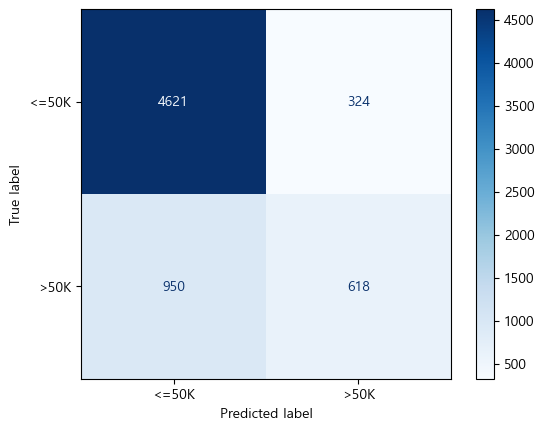

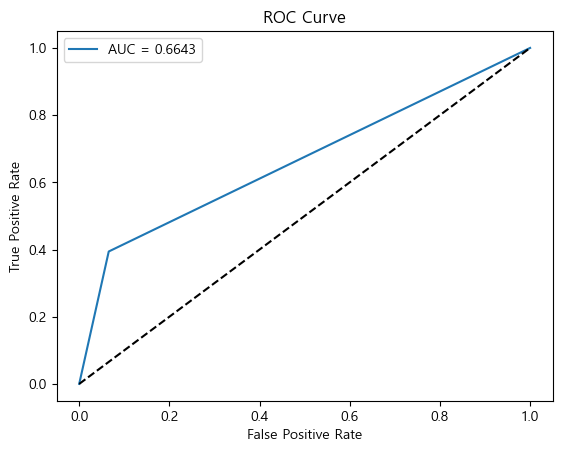

In [13]:
display_plots(y_test_enc, y_pred, pred_proba)

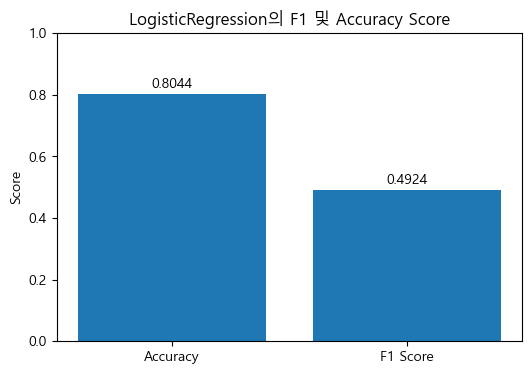

In [14]:
display_plots_2(lgrg_clf, y_test_enc, y_pred, pred_proba)

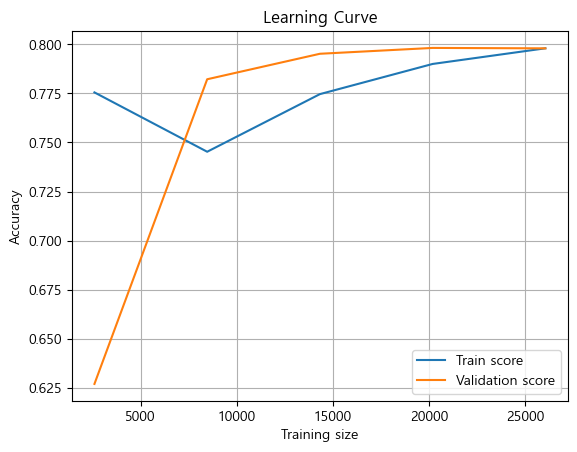

In [15]:
display_learning_curves(X_enc, y_enc, lgrg_clf)

In [16]:
# ÏµúÏ†ÅÌôî Î™®Îç∏
best_lgrg_clf = LogisticRegression()

param_grid = {
    'max_iter': [50, 100, 500],
    'C': [200, 500, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(best_lgrg_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train_enc)

print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä):", grid_search.best_score_)

best_model = grid_search.best_estimator_
lgrg_y_pred = best_model.predict(X_test)

print("ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC):", roc_auc_score(y_test_enc, lgrg_y_pred))

ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'C': 500, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä): 0.8250819092103049
ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC): 0.6690657177936898


In [17]:
best_lgrg_clf = LogisticRegression(C=200, max_iter=100, penalty='l1', solver='liblinear')
best_lgrg_clf.fit(X_train, y_train_enc)

lgrg_y_pred = best_lgrg_clf.predict(X_test)

pred_proba = best_lgrg_clf.predict_proba(X_test)

get_score(y_test_enc, lgrg_y_pred)

ROC AUC Score: 0.6690657177936898
Accuracy: 0.8050053738676494
F1 Score: 0.5011783189316575


In [18]:
display_plots(y_test_enc, lgrg_y_pred, pred_proba)

In [19]:
display_plots_2(best_lgrg_clf, y_test_enc, lgrg_y_pred, pred_proba)

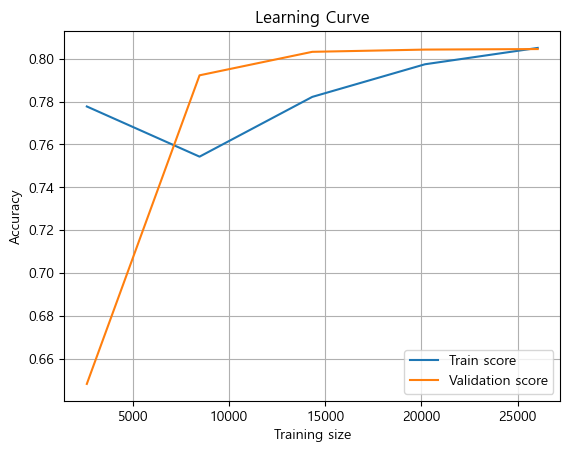

In [20]:
display_learning_curves(X_enc, y_enc, best_lgrg_clf)

### KNN

In [21]:
# ÎîîÌè¥Ìä∏
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_enc)

y_pred = knn_clf.predict(X_test)

pred_proba = knn_clf.predict_proba(X_test)

get_score(y_test_enc, y_pred)

ROC AUC Score: 0.722394618868781
Accuracy: 0.7990173499155535
F1 Score: 0.5792349726775956


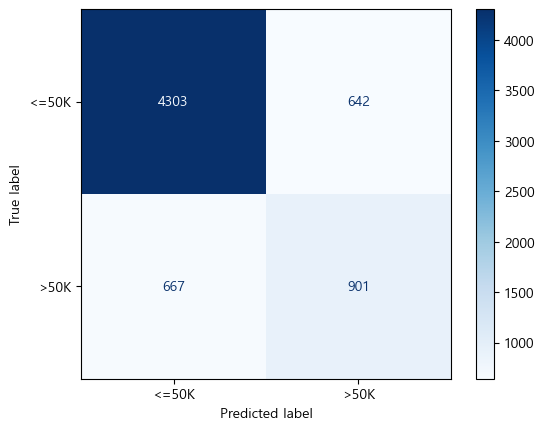

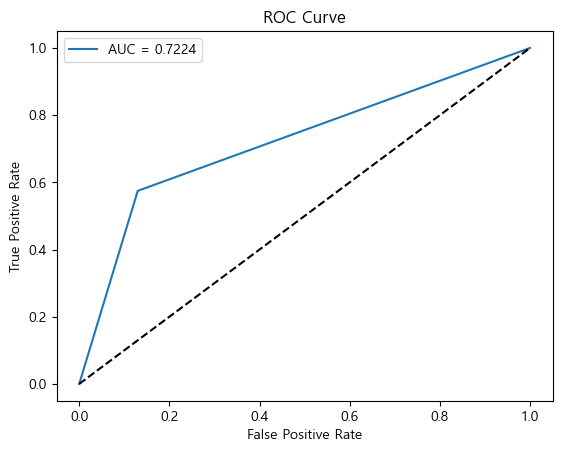

In [22]:
display_plots(y_test_enc, y_pred, pred_proba)

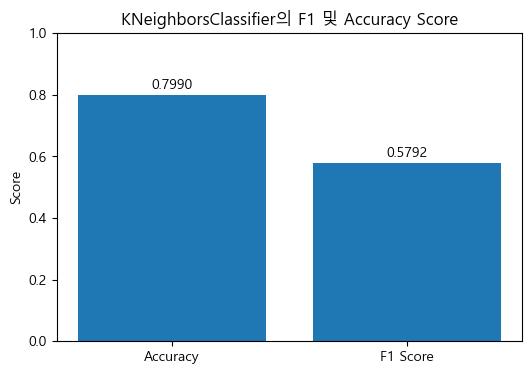

In [23]:
display_plots_2(knn_clf, y_test_enc, y_pred, pred_proba)

In [24]:
display_learning_curves(X_enc, y_enc, knn_clf)

In [25]:
# ÏµúÏ†ÅÌôî Î™®Îç∏
best_knn_clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=best_knn_clf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train_enc)

print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä):", grid_search.best_score_)

best_model = grid_search.best_estimator_
knn_y_pred = best_model.predict(X_test)

print("ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC):", roc_auc_score(y_test_enc, knn_y_pred))

ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä): 0.8432982634796117
ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC): 0.7475473834629909


In [26]:
best_knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
best_knn_clf.fit(X_train, y_train_enc)

knn_y_pred = best_knn_clf.predict(X_test)

pred_proba = best_knn_clf.predict_proba(X_test)

get_score(y_test_enc, knn_y_pred)

ROC AUC Score: 0.7475473834629909
Accuracy: 0.8183632734530938
F1 Score: 0.6182639561148757


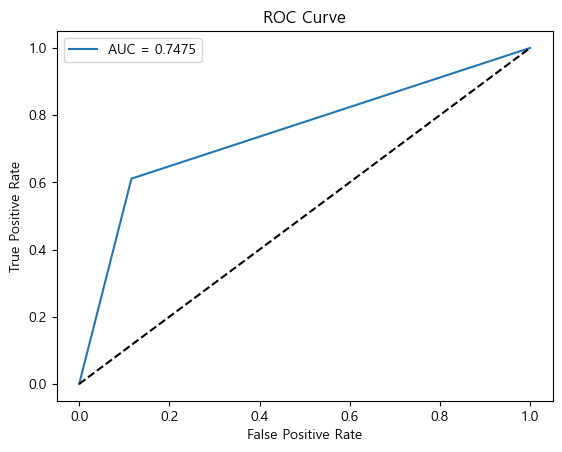

In [27]:
display_plots(y_test_enc, knn_y_pred, pred_proba)

In [28]:
display_plots_2(best_knn_clf, y_test_enc, knn_y_pred, pred_proba)

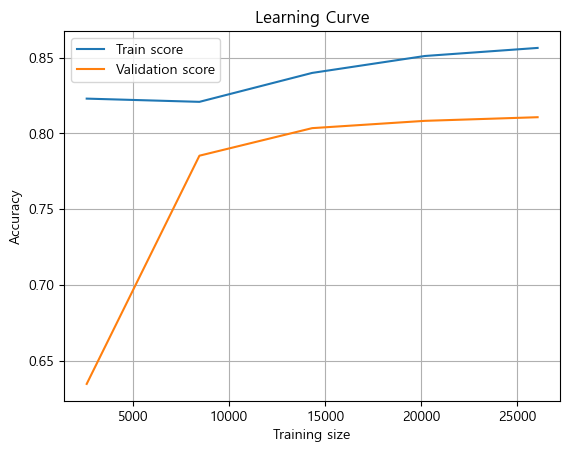

In [29]:
display_learning_curves(X_enc, y_enc, best_knn_clf)

### Decision Tree

In [30]:
# ÎîîÌè¥Ìä∏
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train_enc)

y_pred = dt_clf.predict(X_test)

pred_proba = dt_clf.predict_proba(X_test)

get_score(y_test_enc, y_pred)

ROC AUC Score: 0.6964172220961186
Accuracy: 0.7744510978043913
F1 Score: 0.5381955359949702


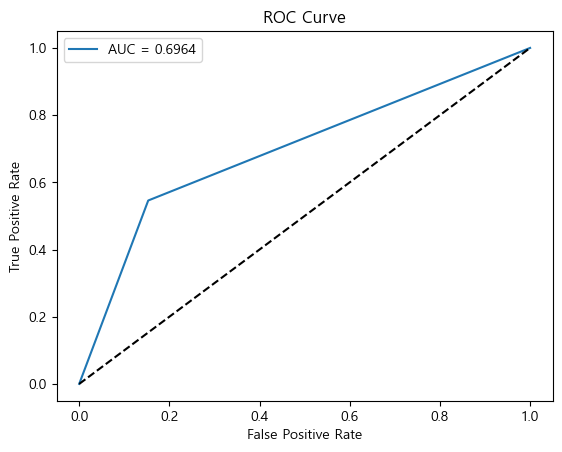

In [31]:
display_plots(y_test_enc, y_pred, pred_proba)

In [32]:
display_plots_2(dt_clf, y_test_enc, y_pred, pred_proba)

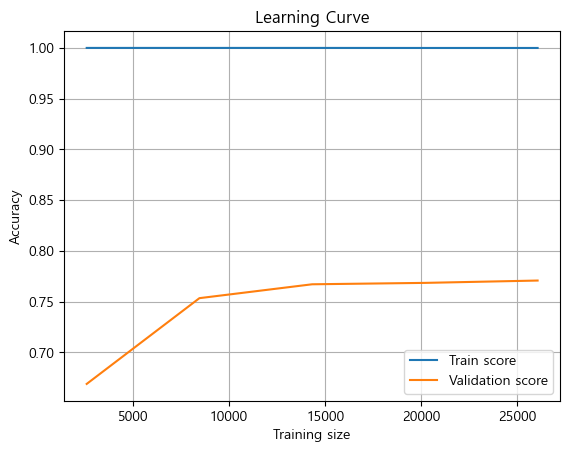

In [33]:
display_learning_curves(X_enc, y_enc, dt_clf)

In [34]:
# ÏµúÏ†ÅÌôî Î™®Îç∏
best_dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
	'max_depth': [3, 5, 10, None],
	'min_samples_split': [2, 5, 10],
	'criterion': ['gini', 'entropy'],
	'min_samples_leaf': [1, 2, 4],
	'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(best_dt_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train_enc)

print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä):", grid_search.best_score_)

best_model = grid_search.best_estimator_
dt_y_pred = best_model.predict(X_test)

print("ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC):", roc_auc_score(y_test_enc, dt_y_pred))

ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä): 0.8678603185999441
ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC): 0.6873046754090918


In [35]:
best_dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2)
best_dt_clf.fit(X_train, y_train_enc)

dt_y_pred = best_dt_clf.predict(X_test)

pred_proba = best_dt_clf.predict_proba(X_test)

get_score(y_test_enc, dt_y_pred)

ROC AUC Score: 0.6873046754090918
Accuracy: 0.8297251650545063
F1 Score: 0.5384935497295048


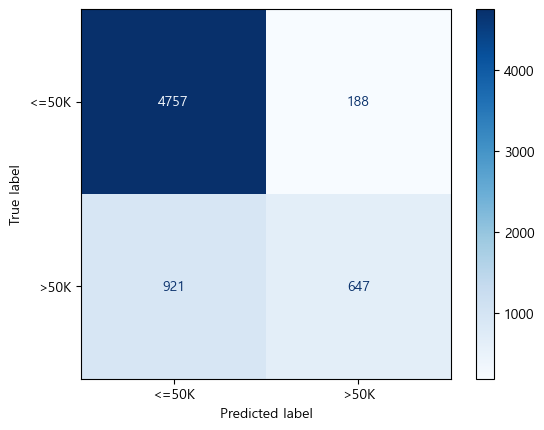

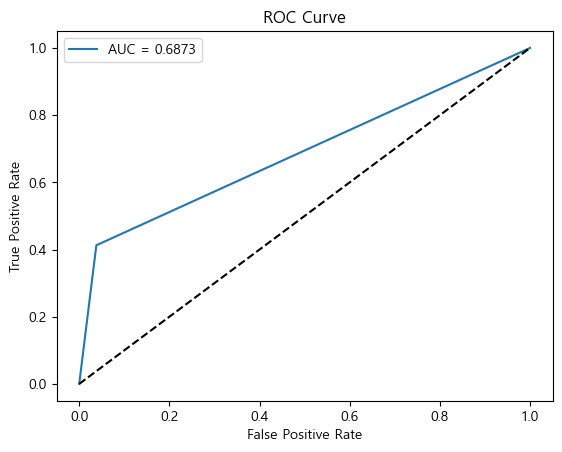

In [36]:
display_plots(y_test_enc, dt_y_pred, pred_proba)

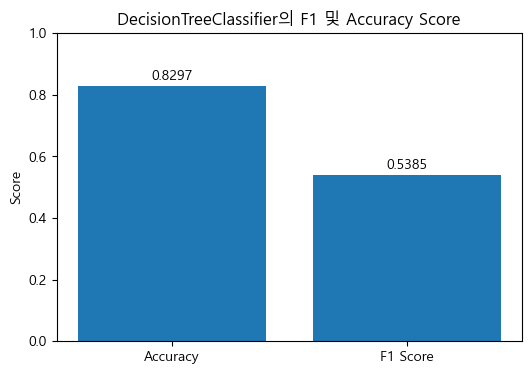

In [37]:
display_plots_2(best_dt_clf, y_test_enc, dt_y_pred, pred_proba)

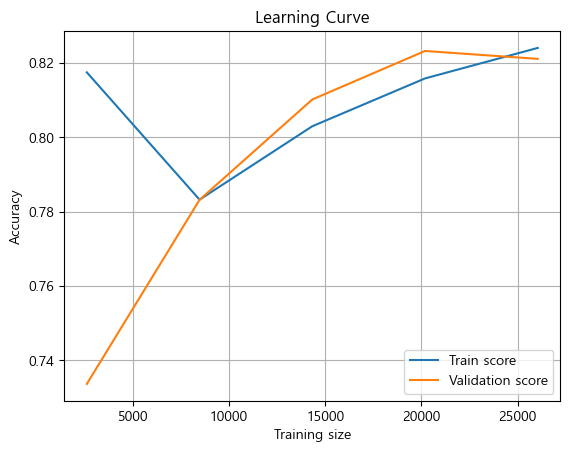

In [38]:
display_learning_curves(X_enc, y_enc, best_dt_clf)

### Random Forest

In [14]:
# ÎîîÌè¥Ìä∏
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_enc)

y_pred = rf_clf.predict(X_test)

pred_proba = rf_clf.predict_proba(X_test)

get_score(y_test_enc, y_pred)

ROC AUC Score: 0.7504568106312294
Accuracy: 0.8340242591739597
F1 Score: 0.6309320587231136


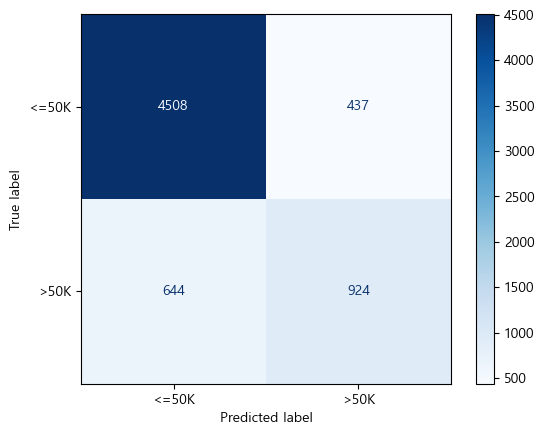

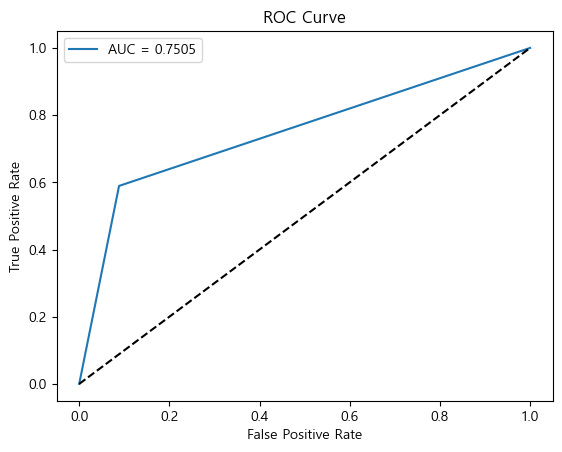

In [40]:
display_plots(y_test_enc, y_pred, pred_proba)

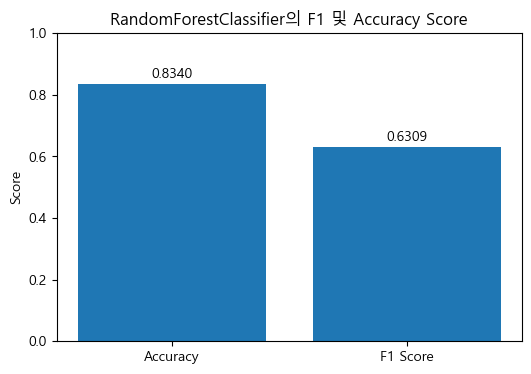

In [41]:
display_plots_2(rf_clf, y_test_enc, y_pred, pred_proba)

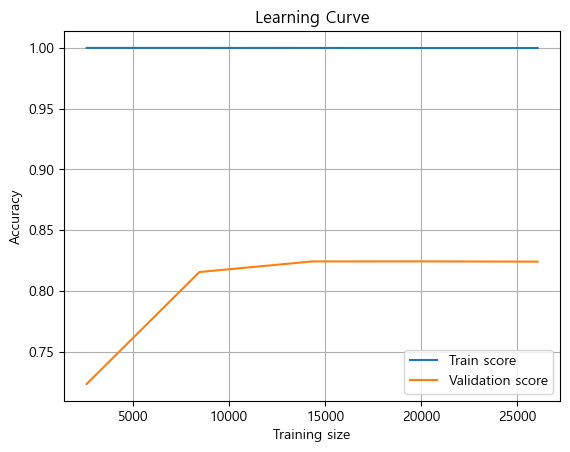

In [42]:
display_learning_curves(X_enc, y_enc, rf_clf)

In [15]:
# ÏµúÏ†ÅÌôî Î™®Îç∏
best_rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
		'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    best_rf_clf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train_enc)

print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä):", grid_search.best_score_)

best_model = grid_search.best_estimator_
rf_y_pred = best_model.predict(X_test)

print("ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC):", roc_auc_score(y_test_enc, rf_y_pred))

ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
ÏµúÍ≥† Ï†ïÌôïÎèÑ (CV Í∏∞Ï§Ä): 0.8895675300278854
ÌÖåÏä§Ìä∏ÏÖã Ï†ïÌôïÎèÑ(ROC): 0.7415520341099028


In [16]:
best_rf_clf = RandomForestClassifier(random_state=42, bootstrap=True, class_weight=None, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=400)
best_rf_clf.fit(X_train, y_train_enc)

rf_y_pred = best_rf_clf.predict(X_test)

pred_proba = best_rf_clf.predict_proba(X_test)

get_score(y_test_enc, rf_y_pred)

ROC AUC Score: 0.7415520341099028
Accuracy: 0.8400122831260556
F1 Score: 0.6240981240981242


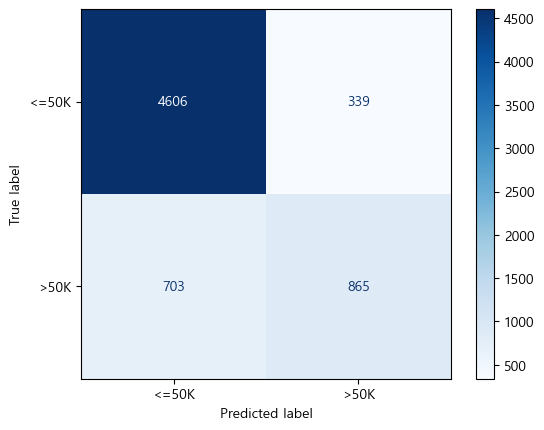

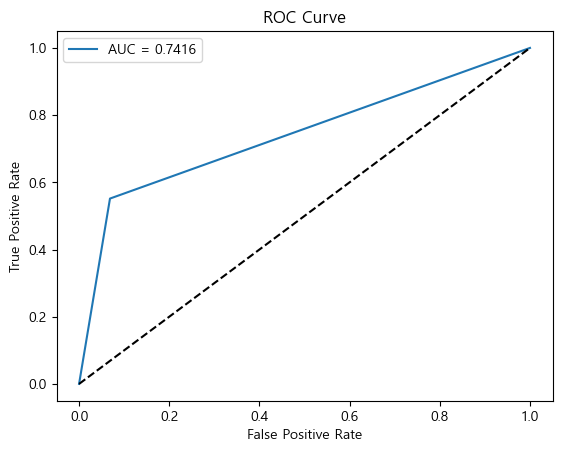

In [17]:
display_plots(y_test_enc, rf_y_pred, pred_proba)

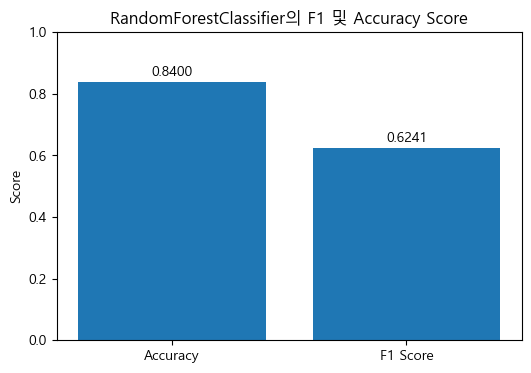

In [18]:
display_plots_2(best_rf_clf, y_test_enc, rf_y_pred, pred_proba)

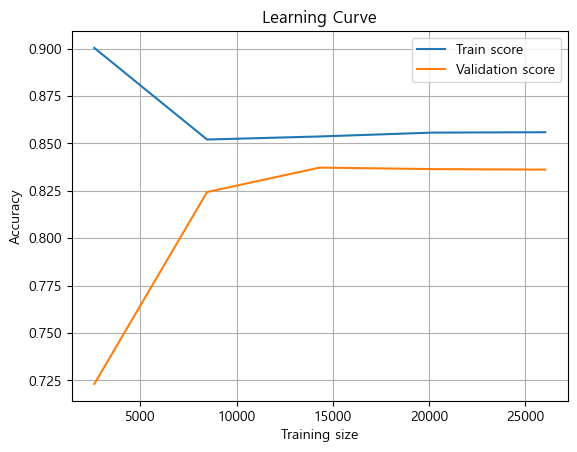

In [19]:
display_learning_curves(X_enc, y_enc, best_rf_clf)

### ÏµúÏ¢Ö

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


results = {}

models = {
	"Logistic Classifier": LogisticRegression(),
	"KNN Classifier": KNeighborsClassifier(),
	"Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
	"RandomForest Classifier": RandomForestClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    roc_auc = format(roc_auc_score(y_test_enc, y_pred), '.4f')
    accuracy = format(accuracy_score(y_test_enc, y_pred), '.4f')
    f1 = format(f1_score(y_test_enc, y_pred), '.4f')
    results[name] = {'ROC_AUC':roc_auc,'Accuracy': accuracy, 'F1': f1}


In [21]:
# Í≤∞Í≥º Ï∂úÎ†•
results_df = pd.DataFrame(results).T
print(results_df)

                         ROC_AUC Accuracy      F1
Logistic Classifier       0.6643   0.8033  0.4923
KNN Classifier            0.7224   0.7990  0.5792
Decision Tree Classifier  0.6964   0.7745  0.5382
RandomForest Classifier   0.7505   0.8340  0.6309


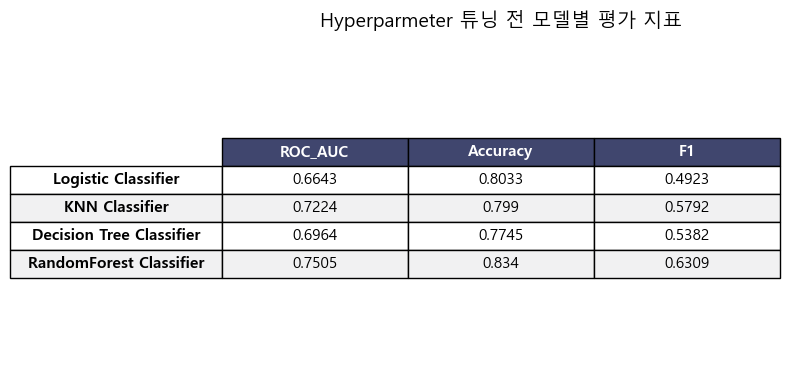

In [22]:
# Í≤∞Í≥º Ï†ïÎ†¨
results_sorted = results_df

# 'MAE', 'RMSE', 'R2' Ïó¥ÏùÑ floatÏúºÎ°ú Î≥ÄÌôò
results_sorted['ROC_AUC'] = pd.to_numeric(results_sorted['ROC_AUC'], errors='coerce')
results_sorted['Accuracy'] = pd.to_numeric(results_sorted['Accuracy'], errors='coerce')
results_sorted['F1'] = pd.to_numeric(results_sorted['F1'], errors='coerce')

# ÌîåÎ°Ø ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
fig, ax = plt.subplots(figsize=(8, 4))  # Ìëú ÌÅ¨Í∏∞ Ï°∞Ï†à Í∞ÄÎä•

# x, y Ï∂ï Ïà®Í∏∞Í∏∞
ax.axis('off')

# ÌÖåÏù¥Î∏î Ï∂îÍ∞Ä
table = ax.table(cellText=np.round(results_sorted.values,4),
                 colLabels=results_sorted.columns,
                 rowLabels=results_sorted.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.scale(1, 1.5)  # ÏÖÄ ÌÅ¨Í∏∞ Ï°∞Ï†à
table.auto_set_font_size(False)
table.set_fontsize(11)

# ÏÖÄ Î∞∞Í≤ΩÏÉâ (Ìó§Îçî Í∞ïÏ°∞)
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
    if row == 0:
        cell.set_facecolor('#40466e')  # Ìó§Îçî Î∞∞Í≤Ω
        cell.set_text_props(color='w')  # Ìó§Îçî ÌÖçÏä§Ìä∏ ÏÉâ
    elif row % 2 == 0:
        cell.set_facecolor('#f1f1f2')  # ÏßùÏàòÌñâ Î∞∞Í≤Ω
    else:
        cell.set_facecolor('#ffffff')  # ÌôÄÏàòÌñâ Î∞∞Í≤Ω

plt.title("Hyperparmeter ÌäúÎãù Ï†Ñ Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä ÏßÄÌëú", fontsize=14)
plt.tight_layout()
plt.show()


In [23]:
results_sorted_dict = results_sorted.T.to_dict()
results_sorted_dict

{'Logistic Classifier': {'ROC_AUC': 0.6643, 'Accuracy': 0.8033, 'F1': 0.4923},
 'KNN Classifier': {'ROC_AUC': 0.7224, 'Accuracy': 0.799, 'F1': 0.5792},
 'Decision Tree Classifier': {'ROC_AUC': 0.6964,
  'Accuracy': 0.7745,
  'F1': 0.5382},
 'RandomForest Classifier': {'ROC_AUC': 0.7505,
  'Accuracy': 0.834,
  'F1': 0.6309}}

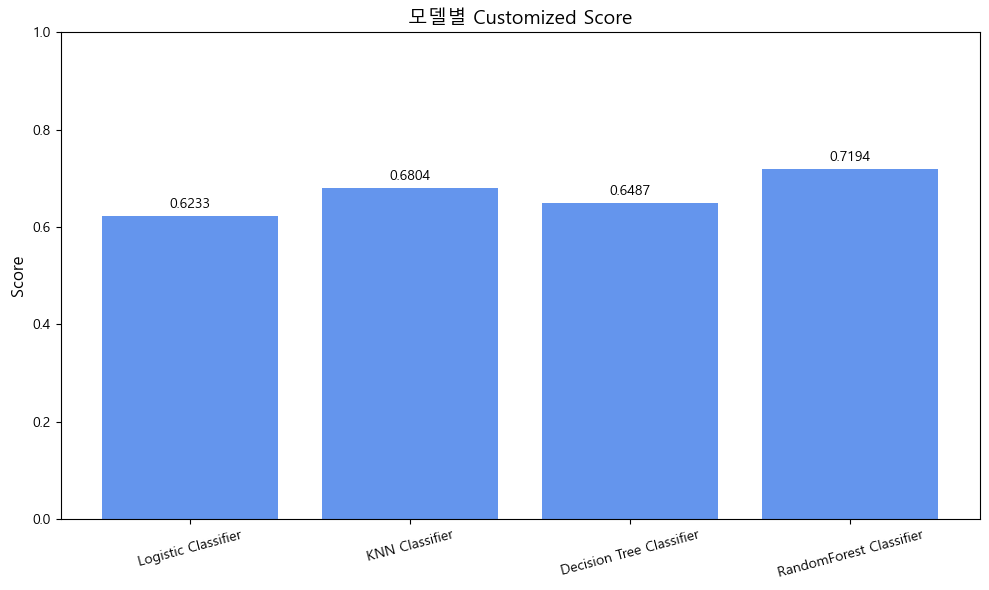

In [24]:
# score = 1 - (0.2 * (MAE / IQR) + 0.2 * (RMSE / IQR) + 0.6 * (1 - R¬≤))
def calculate_custom_score(auc, accuracy, f1):
    """
    ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î∂ÑÎ•ò ÏÑ±Îä• Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞ Ìï®Ïàò.
    auc, accuracy, f1 scoreÎ•º Í∞ÄÏ§ëÌèâÍ∑†ÎÇ¥Ïñ¥ Í≥ÑÏÇ∞Ìï®

    Parameters:
    - auc, accuracy, f1

    Returns:
    - custom_score: 0~1 ÏÇ¨Ïù¥Ïùò Ïä§ÏΩîÏñ¥, 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ±Îä•Ïù¥ Ïö∞Ïàò
    """
    return 0.4 * f1 + 0.4 * auc + 0.2 * accuracy

scores = {}
for model, metrics in results_sorted_dict.items():
    score = calculate_custom_score(metrics["ROC_AUC"], metrics["Accuracy"], metrics["F1"])
    scores[model] = score

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
models = list(scores.keys())
score_values = list(scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, score_values, color='cornflowerblue')
plt.title("Î™®Îç∏Î≥Ñ Customized Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [25]:
results_dict = {}
def get_mse_r2score_all(model, y_test, y_pred,model_name):
    if hasattr(model, 'coef_'):
        print("Í≥ÑÏàò (coef_):\n", model.coef_)
        print("Ï†àÌé∏ (intercept):", model.intercept_)
    else:
        print("Ïù¥ Î™®Îç∏ÏùÄ Í≥ÑÏàò(coef_)ÏôÄ Ï†àÌé∏(intercept_)ÏùÑ Ï†úÍ≥µÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

    roc_auc = format(roc_auc_score(y_test_enc, y_pred), '.4f')
    accuracy = format(accuracy_score(y_test_enc, y_pred), '.4f')
    f1 = format(f1_score(y_test_enc, y_pred), '.4f')

    print("ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC):", roc_auc)
    print("ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy):", accuracy)
    print("Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score):", f1)

    results_dict[model_name] = {'ROC_AUC': roc_auc, 'Accuracy': accuracy, 'F1': f1}
    return roc_auc, accuracy, f1

In [26]:
models = {
	"Logistic Classifier": LogisticRegression(C=200, max_iter=100, penalty='l1', solver='liblinear'),
	"KNN Classifier": KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform'),
	"Decision Tree Classifier": DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2),
	"RandomForest Classifier": RandomForestClassifier(random_state=42, bootstrap=True, class_weight=None, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=400)
}


In [27]:
results_dict = {}
def get_mse_r2score_all(model, y_test, y_pred,model_name):

    roc_auc = format(roc_auc_score(y_test_enc, y_pred), '.4f')
    accuracy = format(accuracy_score(y_test_enc, y_pred), '.4f')
    f1 = format(f1_score(y_test_enc, y_pred), '.4f')

    print("ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC):", roc_auc)
    print("ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy):", accuracy)
    print("Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score):", f1)

    results_dict[model_name] = {'ROC_AUC': roc_auc, 'Accuracy': accuracy, 'F1': f1}
    return roc_auc, accuracy, f1


In [28]:
for name, model in models.items():
	print(f"\n‚ñ∂ {name} Í≤∞Í≥º:")
	model.fit(X_train, y_train_enc)
	y_pred = model.predict(X_test)
	get_mse_r2score_all(model, y_test_enc, y_pred,name)



‚ñ∂ Logistic Classifier Í≤∞Í≥º:
ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC): 0.6691
ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy): 0.8050
Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score): 0.5012

‚ñ∂ KNN Classifier Í≤∞Í≥º:
ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC): 0.7475
ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy): 0.8184
Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score): 0.6183

‚ñ∂ Decision Tree Classifier Í≤∞Í≥º:
ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC): 0.6873
ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy): 0.8297
Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score): 0.5385

‚ñ∂ RandomForest Classifier Í≤∞Í≥º:
ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞® (ROC_AUC): 0.7416
ÌèâÍ∑†Ï†úÍ≥±Í∑ºÏò§Ï∞® (Accuracy): 0.8400
Í≤∞Ï†ïÍ≥ÑÏàò (R¬≤ Score): 0.6241


In [29]:
results_df = pd.DataFrame(results_dict).T
# print("\nüìä Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê:")
print(results_df)

                         ROC_AUC Accuracy      F1
Logistic Classifier       0.6691   0.8050  0.5012
KNN Classifier            0.7475   0.8184  0.6183
Decision Tree Classifier  0.6873   0.8297  0.5385
RandomForest Classifier   0.7416   0.8400  0.6241


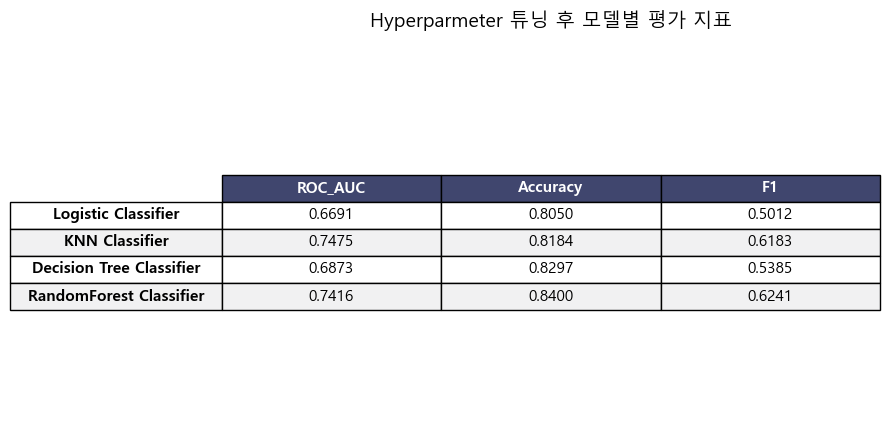

In [30]:
import matplotlib.pyplot as plt

# Í≤∞Í≥º Ï†ïÎ†¨
results_sorted = results_df

# ÌÖåÏù¥Î∏î ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(9, 4.5))  # Ï†ÑÏ≤¥ ÎèÑÌëú ÌÅ¨Í∏∞

# Ï∂ï Ïà®Í∏∞Í∏∞
ax.axis('off')

# ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞
table = ax.table(
    cellText=results_sorted.values,  # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ Î∞òÏò¨Î¶º
    colLabels=results_sorted.columns,
    rowLabels=results_sorted.index,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# ÏÖÄ ÌÅ¨Í∏∞ Î∞è Ìè∞Ìä∏ Ï°∞Ï†ï
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(11)

# ÏÖÄ Î∞∞Í≤ΩÏÉâ (Ìó§Îçî Í∞ïÏ°∞)
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
    if row == 0:
        cell.set_facecolor('#40466e')  # Ìó§Îçî Î∞∞Í≤Ω
        cell.set_text_props(color='w')  # Ìó§Îçî ÌÖçÏä§Ìä∏ ÏÉâ
    elif row % 2 == 0:
        cell.set_facecolor('#f1f1f2')  # ÏßùÏàòÌñâ Î∞∞Í≤Ω
    else:
        cell.set_facecolor('#ffffff')  # ÌôÄÏàòÌñâ Î∞∞Í≤Ω

plt.title("Hyperparmeter ÌäúÎãù ÌõÑ Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä ÏßÄÌëú", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [31]:
results_sorted_dict = results_sorted.T.to_dict()
results_sorted_dict

{'Logistic Classifier': {'ROC_AUC': '0.6691',
  'Accuracy': '0.8050',
  'F1': '0.5012'},
 'KNN Classifier': {'ROC_AUC': '0.7475', 'Accuracy': '0.8184', 'F1': '0.6183'},
 'Decision Tree Classifier': {'ROC_AUC': '0.6873',
  'Accuracy': '0.8297',
  'F1': '0.5385'},
 'RandomForest Classifier': {'ROC_AUC': '0.7416',
  'Accuracy': '0.8400',
  'F1': '0.6241'}}

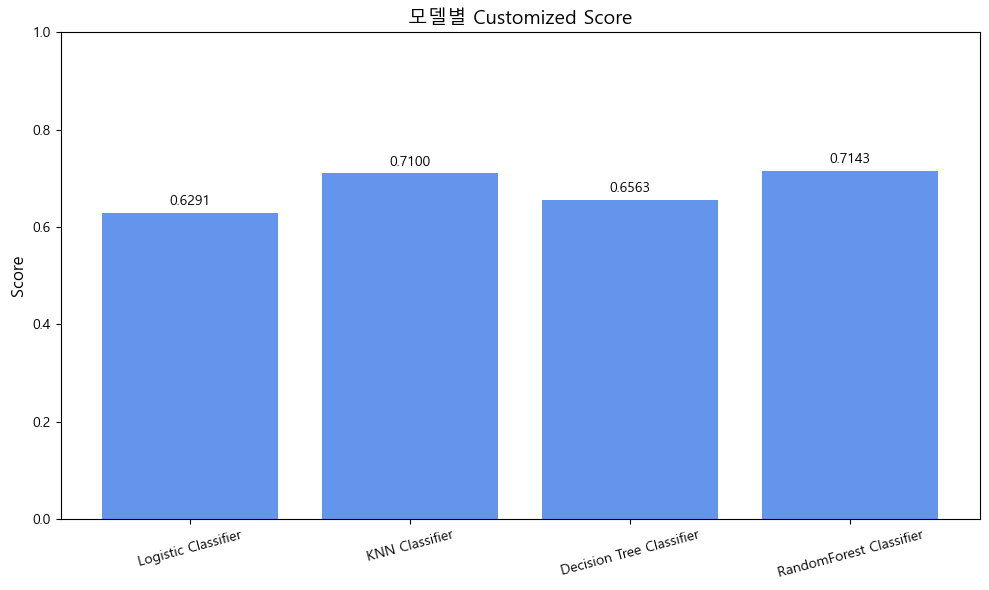

In [32]:
# score = 1 - (0.2 * (MAE / IQR) + 0.2 * (RMSE / IQR) + 0.6 * (1 - R¬≤))
def calculate_custom_score(auc, accuracy, f1):
    """
    ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î∂ÑÎ•ò ÏÑ±Îä• Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞ Ìï®Ïàò.
    auc, accuracy, f1 scoreÎ•º Í∞ÄÏ§ëÌèâÍ∑†ÎÇ¥Ïñ¥ Í≥ÑÏÇ∞Ìï®

    Parameters:
    - auc, accuracy, f1

    Returns:
    - custom_score: 0~1 ÏÇ¨Ïù¥Ïùò Ïä§ÏΩîÏñ¥, 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏÑ±Îä•Ïù¥ Ïö∞Ïàò
    """
    auc = float(auc)
    accuracy = float(accuracy)
    f1 = float(f1)
    return 0.4 * f1 + 0.4 * auc + 0.2 * accuracy

scores = {}
for model, metrics in results_sorted_dict.items():
    score = calculate_custom_score(metrics["ROC_AUC"], metrics["Accuracy"], metrics["F1"])
    scores[model] = score

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
models = list(scores.keys())
score_values = list(scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, score_values, color='cornflowerblue')
plt.title("Î™®Îç∏Î≥Ñ Customized Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()